In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('global_power.csv')

In [3]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [4]:
data.shape

(908, 25)

In [5]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [7]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

## Categorical columns
- country
- country_long
- name
- gppd_idnr
- primary_fuel             
- other_fuel1              
- other_fuel2              
- owner                    
- source                   
- url                      
- geolocation_source       
- generation_data_source   
 
    

In [8]:
data['country'].value_counts()

IND    908
Name: country, dtype: int64

In [9]:
data['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

In [10]:
data['name'].value_counts()

SURYA                              1
BUDHIL                             1
TARAPUR                            1
KUNDARGI MILL                      1
Itnal Solar Power Plant            1
                                  ..
Bap - GIS 1-2 Solar Power Plant    1
VIZAG TPP                          1
Ruchi Soya Palsodi Wind Farm       1
Shree Southern Wind Farm           1
RELIANCE ENERGY                    1
Name: name, Length: 908, dtype: int64

In [11]:
data['gppd_idnr'].value_counts()

WRI1026192    1
IND0000366    1
WRI1026072    1
IND0000335    1
IND0000162    1
             ..
IND0000165    1
IND0000407    1
WRI1026092    1
IND0000084    1
IND0000300    1
Name: gppd_idnr, Length: 908, dtype: int64

In [12]:
data['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [13]:
data['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [14]:
data['other_fuel2'].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [15]:
data['other_fuel3'].value_counts()

Series([], Name: other_fuel3, dtype: int64)

In [16]:
data['owner'].value_counts()

Sterling Agro Industries ltd.                            4
Jk Cement ltd                                            4
Acc Acc ltd                                              4
Government of India                                      3
Hindustan Zinc ltd                                       3
                                                        ..
Rajasthan Renewable Energy Corporation Limited (RREC)    1
ACME Cleantech Solutions Private Limited                 1
Newton Solar Private Limited                             1
Atma Powers Private Limited                              1
Gujurat Alkalies and Chemicals Limited                   1
Name: owner, Length: 280, dtype: int64

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Ym Ssk ltd                                     1
Sahakarmaharshi Bhausaheb thor                 1
Firestone Trading Private Limited              1
Tata BP Solar India Limited                    1
Dcm & chem                                     1
Name: source, Length: 191, dtype: int64

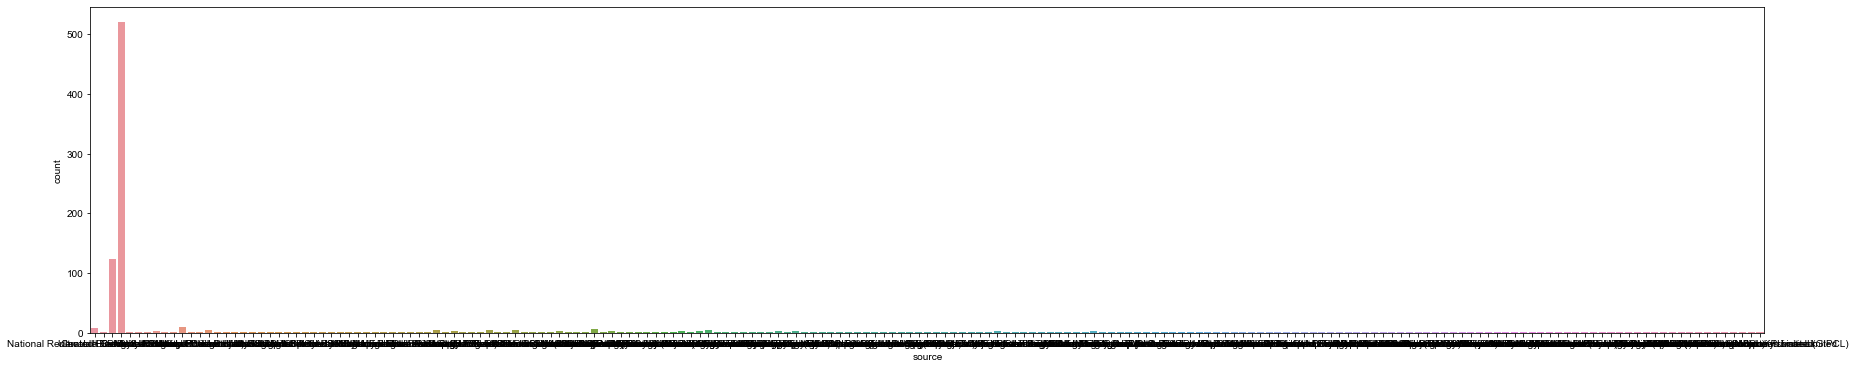

In [17]:
plt.figure(figsize=(30,6))
sns.countplot(data['source'])
sns.set_theme(font_scale=1.8)
data['source'].value_counts()

In [18]:
data['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [19]:
data['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [20]:
data['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [21]:
data['generation_gwh_2013'].value_counts()

0.00000       21
1262.13760     1
182.13000      1
108.98235      1
808.83550      1
              ..
2998.44600     1
3683.91000     1
6397.00000     1
941.00000      1
1730.00000     1
Name: generation_gwh_2013, Length: 364, dtype: int64

0.00000        28
483.04300       1
770.18000       1
1014.80000      1
3968.14100      1
               ..
1103.93260      1
18807.00000     1
5380.26710      1
2.85387         1
7744.00000      1
Name: generation_gwh_2014, Length: 374, dtype: int64

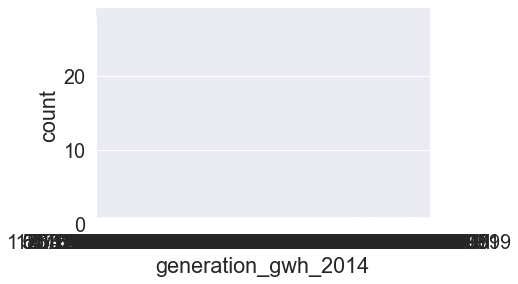

In [22]:
sns.countplot(data['generation_gwh_2014'])
data['generation_gwh_2014'].value_counts()

In [23]:
data['generation_gwh_2015'].value_counts()

0.00000       28
240.79990      1
2924.00000     1
3085.49500     1
74.68470       1
              ..
1947.48365     1
588.74000      1
618.90990      1
3480.74000     1
909.00000      1
Name: generation_gwh_2015, Length: 398, dtype: int64

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

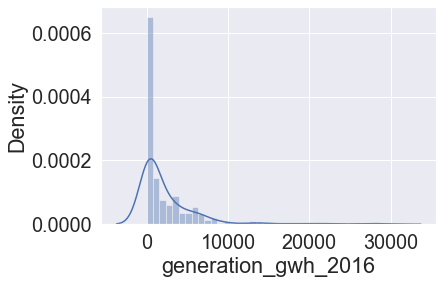

In [24]:
data['generation_gwh_2016'].value_counts()
sns.distplot(data['generation_gwh_2016'])

0.000000       33
170.085300      2
1563.457000     1
7290.568000     1
916.480000      1
               ..
3738.400000     1
802.198850      1
1166.965850     1
82.655645       1
430.000000      1
Name: generation_gwh_2017, Length: 410, dtype: int64

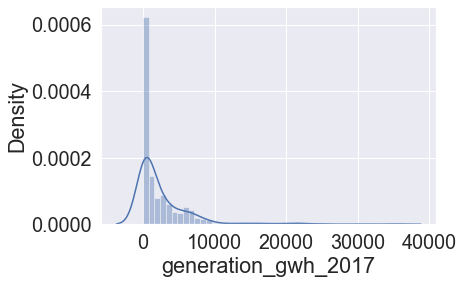

In [25]:
sns.distplot(data['generation_gwh_2017'])
data['generation_gwh_2017'].value_counts()

24.1917    3
19.0004    3
10.3118    2
15.1839    2
14.2133    2
          ..
23.9784    1
24.5216    1
17.5010    1
20.9099    1
16.3125    1
Name: latitude, Length: 837, dtype: int64

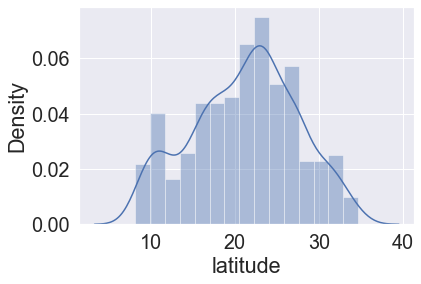

In [26]:
sns.distplot(data['latitude'])
data['latitude'].value_counts()

71.6917    4
75.8988    3
81.2875    3
71.6918    3
72.8983    3
          ..
79.0548    1
78.6463    1
88.4562    1
75.5302    1
87.2500    1
Name: longitude, Length: 828, dtype: int64

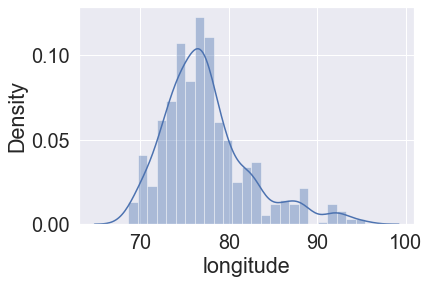

In [27]:
sns.distplot(data['longitude'])
data['longitude'].value_counts()

5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
31.2       1
105.7      1
63.2       1
49.6       1
2.5        1
Name: capacity_mw, Length: 365, dtype: int64

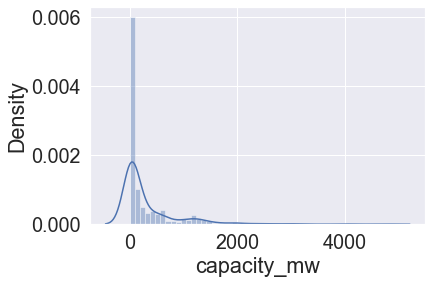

In [28]:
sns.distplot(data['capacity_mw'])
data['capacity_mw'].value_counts()

### Here there are lots of missing data in otherfuel2,otherfuel3,weppid,estimated generation gwh so we will drop these columns.

In [29]:
data.drop(columns=['latitude','longitude','url','other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

## fill missing values

In [30]:
data.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     566
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [31]:
data['other_fuel1'].fillna(data['other_fuel1'].mode()[0],inplace=True)

In [32]:
data['commissioning_year'].fillna(data['commissioning_year'].mode()[0],inplace=True)

In [33]:
data['geolocation_source'].fillna(data['geolocation_source'].mode()[0],inplace=True)
data['year_of_capacity_data'].fillna(data['year_of_capacity_data'].mode()[0],inplace=True)

In [34]:
data['generation_gwh_2013'].fillna(data['generation_gwh_2013'].mean(),inplace=True)
data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean(),inplace=True)
data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean(),inplace=True)
data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean(),inplace=True)
data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean(),inplace=True)
data['generation_data_source'].fillna(data['generation_data_source'].mode()[0],inplace=True)
data['owner'].fillna(data['owner'].mode()[0],inplace=True)

In [35]:
data.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

## Now no missing value in dataset

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   primary_fuel            908 non-null    object 
 6   other_fuel1             908 non-null    object 
 7   commissioning_year      908 non-null    float64
 8   owner                   908 non-null    object 
 9   source                  908 non-null    object 
 10  geolocation_source      908 non-null    object 
 11  year_of_capacity_data   908 non-null    float64
 12  generation_gwh_2013     908 non-null    float64
 13  generation_gwh_2014     908 non-null    float64
 14  generation_gwh_2015     908 non-null    fl

## Now convert categorical data to numeric data using label encoder.

In [37]:
enc=LabelEncoder()

In [38]:
data['country']=enc.fit_transform(data['country'])
data['country_long']=enc.fit_transform(data['country_long'])
data['name']=enc.fit_transform(data['name'])
data['gppd_idnr']=enc.fit_transform(data['gppd_idnr'])
data['primary_fuel']=enc.fit_transform(data['primary_fuel'])
data['other_fuel1']=enc.fit_transform(data['other_fuel1'])
data['owner']=enc.fit_transform(data['owner'])
data['source']=enc.fit_transform(data['source'])
data['geolocation_source']=enc.fit_transform(data['geolocation_source'])
data['generation_data_source']=enc.fit_transform(data['generation_data_source'])

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    int32  
 1   country_long            908 non-null    int32  
 2   name                    908 non-null    int32  
 3   gppd_idnr               908 non-null    int32  
 4   capacity_mw             908 non-null    float64
 5   primary_fuel            908 non-null    int32  
 6   other_fuel1             908 non-null    int32  
 7   commissioning_year      908 non-null    float64
 8   owner                   908 non-null    int32  
 9   source                  908 non-null    int32  
 10  geolocation_source      908 non-null    int32  
 11  year_of_capacity_data   908 non-null    float64
 12  generation_gwh_2013     908 non-null    float64
 13  generation_gwh_2014     908 non-null    float64
 14  generation_gwh_2015     908 non-null    fl

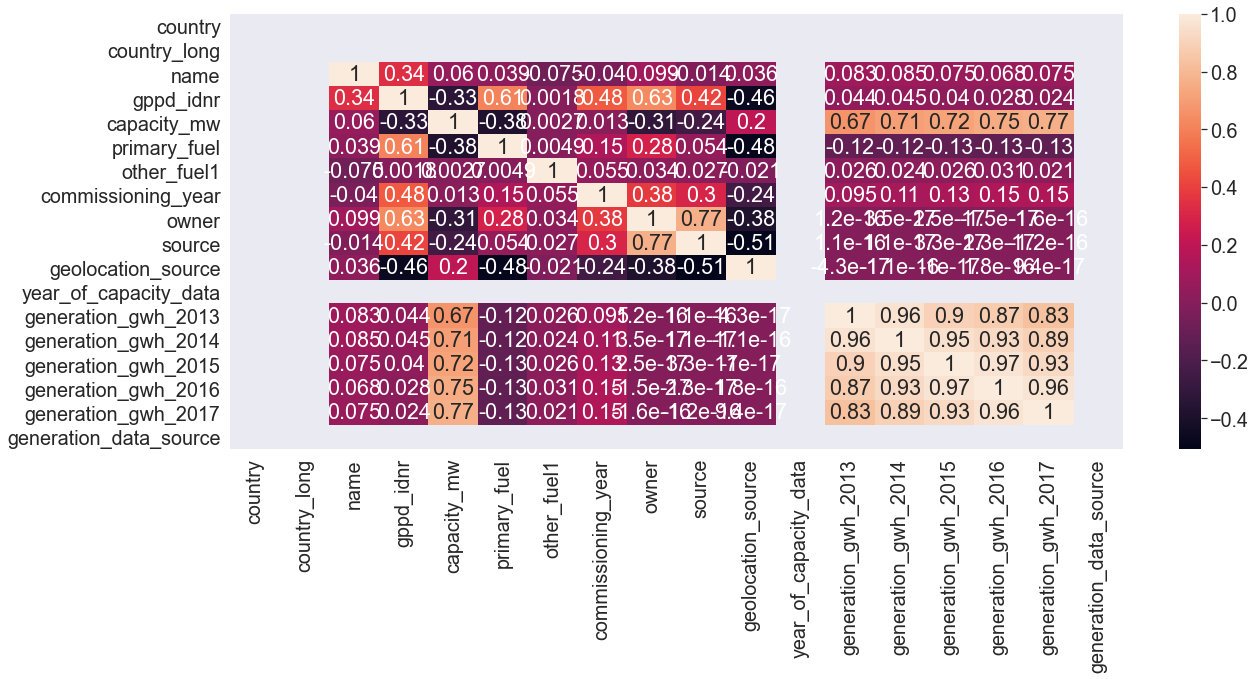

In [40]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True)
sns.set_theme(font_scale=1.2)

In [41]:
data['primary_fuel'].value_counts()

1    259
3    250
6    127
7    123
2     69
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

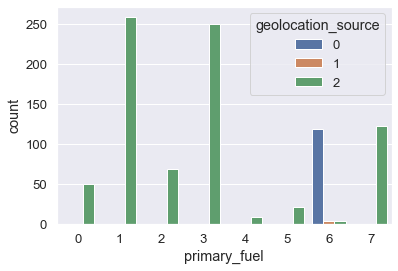

In [42]:
sns.countplot(x=data['primary_fuel'],hue=data['geolocation_source'])

In [43]:
X=data[['capacity_mw','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]
y=data['primary_fuel']

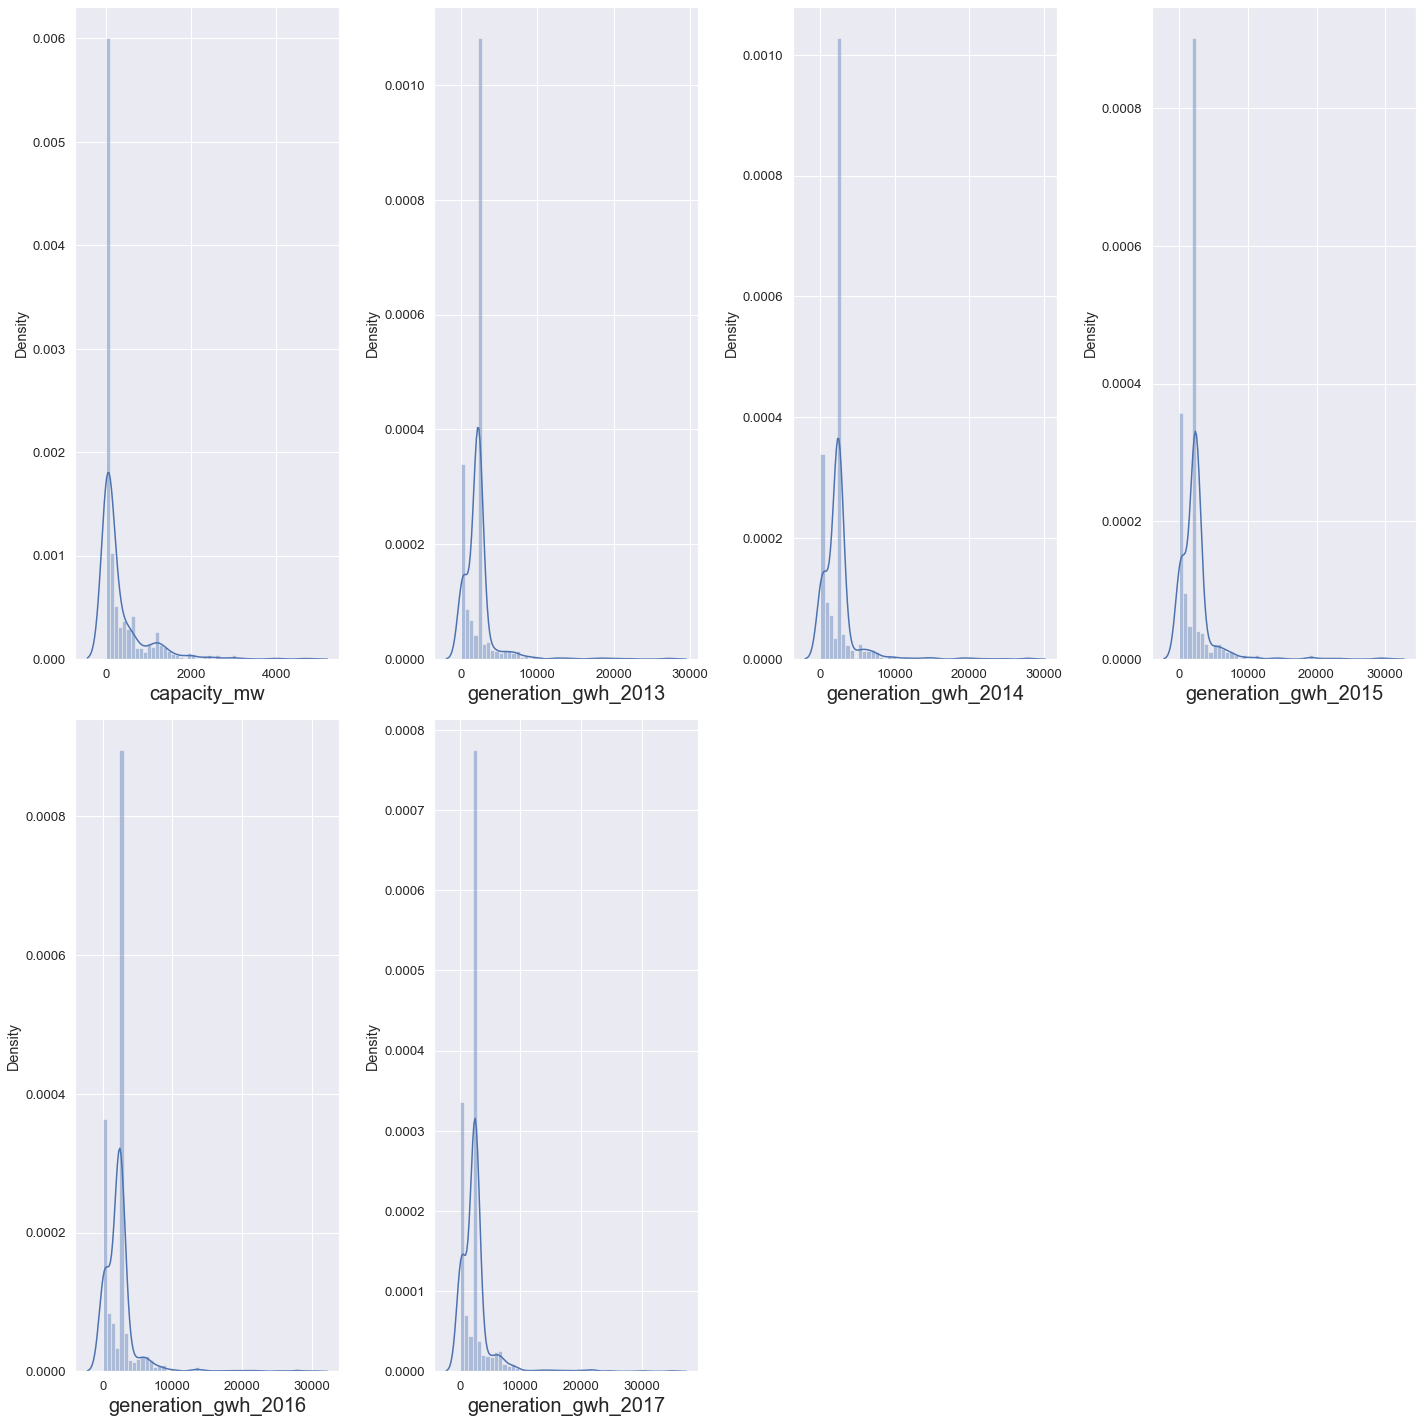

In [44]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in X:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout() # plt.show()

In [45]:
X.skew()

capacity_mw            3.193257
generation_gwh_2013    5.241491
generation_gwh_2014    5.041961
generation_gwh_2015    5.367370
generation_gwh_2016    5.071758
generation_gwh_2017    5.111938
dtype: float64

In [46]:
# Remove outlier 
X['generation_gwh_2013']=np.sqrt(data['generation_gwh_2013'])
X['generation_gwh_2014']=np.sqrt(data['generation_gwh_2014'])
X['generation_gwh_2015']=np.sqrt(data['generation_gwh_2015'])
X['generation_gwh_2016']=np.sqrt(data['generation_gwh_2016'])
X['generation_gwh_2017']=np.sqrt(data['generation_gwh_2017'])
X['capacity_mw']=np.sqrt(data['capacity_mw'])

In [47]:
X.skew()

capacity_mw            1.474543
generation_gwh_2013    1.037355
generation_gwh_2014    0.988517
generation_gwh_2015    1.057697
generation_gwh_2016    0.982545
generation_gwh_2017    0.901027
dtype: float64

In [48]:
X

,capacity_mw,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.581139,48.000617,49.197493,49.133210,49.537221,50.316543
1,9.899495,48.000617,49.197493,49.133210,49.537221,50.316543
2,6.260990,48.000617,49.197493,49.133210,49.537221,50.316543
3,11.618950,25.135193,24.855367,29.047323,29.765827,25.763822
4,42.426407,40.844706,55.095826,76.917943,79.012657,73.386509
...,...,...,...,...,...,...
903,40.000000,48.000617,49.197493,0.997434,15.283869,29.417682
904,1.732051,48.000617,49.197493,49.133210,49.537221,50.316543
905,5.049752,48.000617,49.197493,49.133210,49.537221,50.316543
906,8.944272,48.000617,49.197493,49.133210,49.537221,50.316543


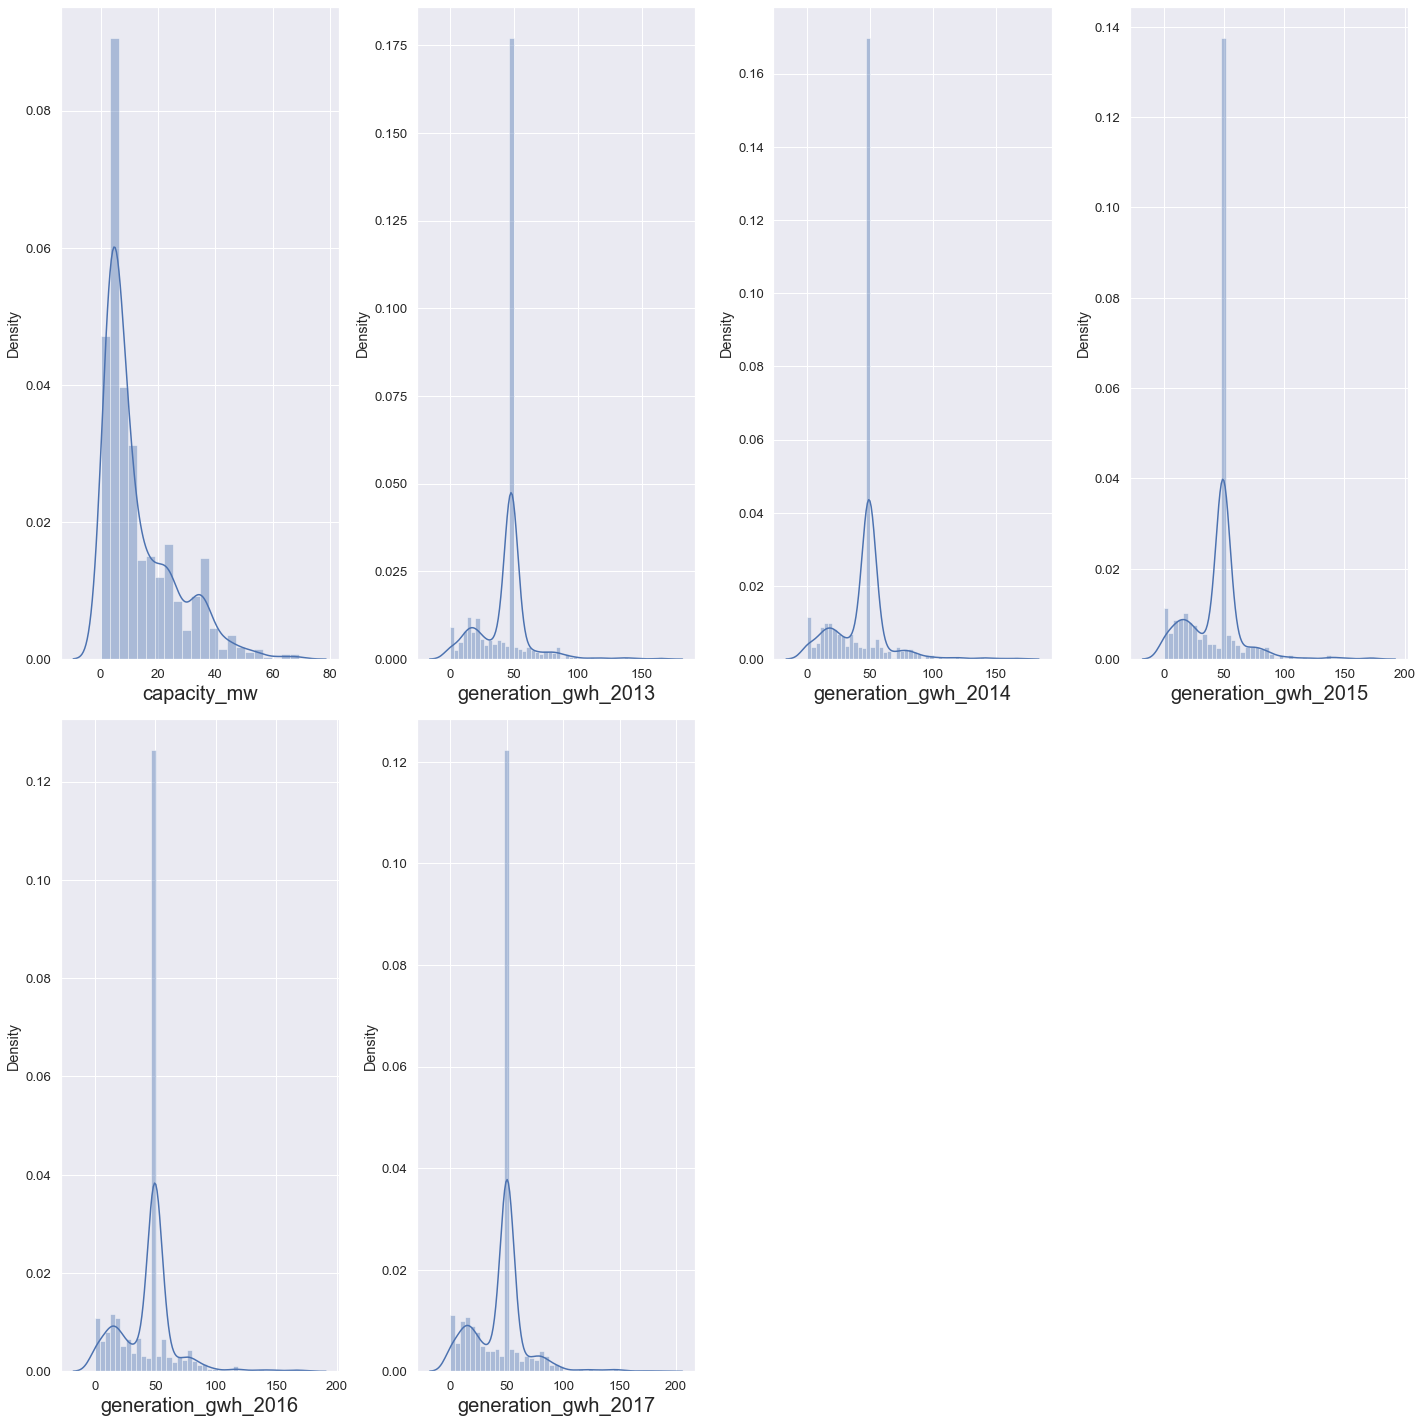

In [49]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in X:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout() # plt.show()

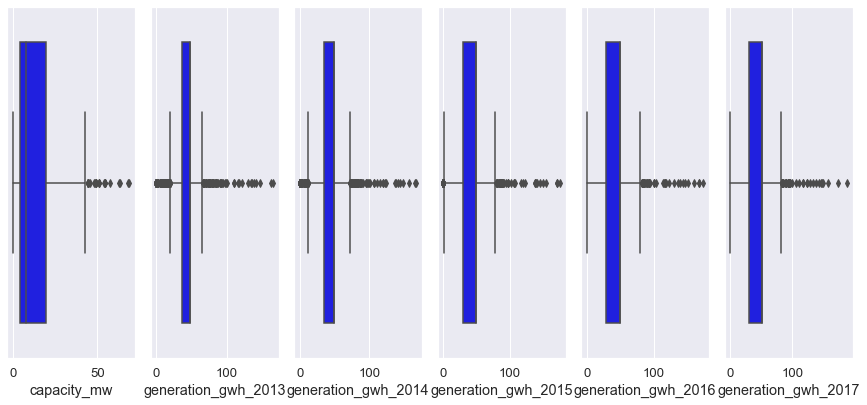

In [50]:
import matplotlib.pyplot as plt
collist=X.columns.values
ncol=30
nrows=16
plt.figure(figsize=(2*ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(X[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [52]:
sc.fit(X)

StandardScaler()

In [53]:
X=sc.transform(X)

In [54]:
X

array([[-0.9198986 ,  0.22383009,  0.23296052,  0.2467625 ,  0.2493346 ,
         0.24953262],
       [-0.24750419,  0.22383009,  0.23296052,  0.2467625 ,  0.2493346 ,
         0.24953262],
       [-0.541614  ,  0.22383009,  0.23296052,  0.2467625 ,  0.2493346 ,
         0.24953262],
       ...,
       [-0.63952152,  0.22383009,  0.23296052,  0.2467625 ,  0.2493346 ,
         0.24953262],
       [-0.32471736,  0.22383009,  0.23296052,  0.2467625 ,  0.2493346 ,
         0.24953262],
       [-0.71936257,  0.22383009,  0.23296052,  0.2467625 ,  0.2493346 ,
         0.24953262]])

In [55]:
y

0      6
1      1
2      7
3      2
4      1
      ..
903    1
904    6
905    7
906    1
907    7
Name: primary_fuel, Length: 908, dtype: int32

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [57]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gn=GaussianNB()
svc=SVC()

In [58]:
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr.fit(X_train,y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state {i},the training accuracy is:-{accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:-{accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:-0.4801762114537445
At random state 0,the testing accuracy is:-0.5594713656387665


At random state 1,the training accuracy is:-0.49926578560939794
At random state 1,the testing accuracy is:-0.4933920704845815


At random state 2,the training accuracy is:-0.5256975036710719
At random state 2,the testing accuracy is:-0.5066079295154186


At random state 3,the training accuracy is:-0.5286343612334802
At random state 3,the testing accuracy is:-0.47577092511013214


At random state 4,the training accuracy is:-0.5212922173274597
At random state 4,the testing accuracy is:-0.5154185022026432


At random state 5,the training accuracy is:-0.5051395007342144
At random state 5,the testing accuracy is:-0.5286343612334802


At random state 6,the training accuracy is:-0.5168869309838473
At random state 6,the testing accuracy is:-0.5242290748898678


At random state 7,the training accuracy is:-0.5168869309838473
At random state 7,the testing accuracy is:-0.5

At random state 64,the training accuracy is:-0.5256975036710719
At random state 64,the testing accuracy is:-0.5198237885462555


At random state 65,the training accuracy is:-0.5198237885462555
At random state 65,the testing accuracy is:-0.5286343612334802


At random state 66,the training accuracy is:-0.4933920704845815
At random state 66,the testing accuracy is:-0.5066079295154186


At random state 67,the training accuracy is:-0.5095447870778267
At random state 67,the testing accuracy is:-0.4977973568281938


At random state 68,the training accuracy is:-0.49632892804698975
At random state 68,the testing accuracy is:-0.46255506607929514


At random state 69,the training accuracy is:-0.5242290748898678
At random state 69,the testing accuracy is:-0.45374449339207046


At random state 70,the training accuracy is:-0.47577092511013214
At random state 70,the testing accuracy is:-0.5330396475770925


At random state 71,the training accuracy is:-0.5301027900146843
At random state 71,the testin

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=79)
for i in [lr,dt,knn,gn,svc]:
    i.fit(X_train,y_train)
    pred=i.predict(X_test)
    test_score=accuracy_score(y_test,pred)
    train_score=accuracy_score(y_train,i.predict(X_train))
    print(i)
    print("Accuracy Score for Test Data is:",test_score)
    print("Accuracy Score for Train Data is: ",train_score)
    print("---------------------Classification Report---------------------")
    print(classification_report(y_test,pred))
    print("-----Confusion Matrix---------")
    print(confusion_matrix(y_test,pred))
    print("\n")

LogisticRegression()
Accuracy Score for Test Data is: 0.5110132158590308
Accuracy Score for Train Data is:  0.5036710719530103
---------------------Classification Report---------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.62      0.65      0.63        68
           2       1.00      0.07      0.13        14
           3       0.60      0.60      0.60        68
           4       0.00      0.00      0.00         2
           5       1.00      0.33      0.50         6
           6       0.30      0.92      0.45        24
           7       0.55      0.18      0.27        34

    accuracy                           0.51       227
   macro avg       0.51      0.34      0.32       227
weighted avg       0.57      0.51      0.48       227

-----Confusion Matrix---------
[[ 0  0  0  0  0  0 11  0]
 [ 0 44  0 16  0  0  4  4]
 [ 0  6  1  7  0  0  0  0]
 [ 0 13  0 41  0  0 14  0]
 [ 0  2  0  0  0  0

# KNeighbour classifier give 64% accuracy

In [60]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [61]:
rc=RandomForestClassifier()
ac=AdaBoostClassifier()
gc=GradientBoostingClassifier()

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=79)
for i in [rc,ac,gc]:
    i.fit(X_train,y_train)
    pred=i.predict(X_test)
    test_score=accuracy_score(y_test,pred)
    train_score=accuracy_score(y_train,i.predict(X_train))
    print(i)
    print("Accuracy Score for test Data is:",test_score)
    print("Accuracy Score for Train Data is: ",train_score)
    print("---------------------Classification Report---------------------")
    print(classification_report(y_test,pred))
    print("-----Confusion Matrix---------")
    print(confusion_matrix(y_test,pred))
    print("\n")

RandomForestClassifier()
Accuracy Score for test Data is: 0.6563876651982379
Accuracy Score for Train Data is:  0.8678414096916299
---------------------Classification Report---------------------
              precision    recall  f1-score   support

           0       0.43      0.55      0.48        11
           1       0.73      0.72      0.73        68
           2       0.36      0.36      0.36        14
           3       0.72      0.68      0.70        68
           4       0.00      0.00      0.00         2
           5       0.50      0.50      0.50         6
           6       0.57      0.83      0.68        24
           7       0.74      0.59      0.66        34

    accuracy                           0.66       227
   macro avg       0.51      0.53      0.51       227
weighted avg       0.66      0.66      0.65       227

-----Confusion Matrix---------
[[ 6  0  0  0  0  1  4  0]
 [ 2 49  5  8  0  0  2  2]
 [ 0  4  5  4  0  1  0  0]
 [ 2 10  1 46  0  1  4  4]
 [ 0  2  0  0  

In [63]:
pred_rc=rc.predict(X_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_rc)
for j in range(2,10):
    lsscore=cross_val_score(rc,X,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("cross validation score is:-",lsc*100)
    print("accuracy_score is:-",lss*100)
    print("\n")

At cv:- 2
cross validation score is:- 58.48017621145374
accuracy_score is:- 65.63876651982379


At cv:- 3
cross validation score is:- 57.930263224998
accuracy_score is:- 65.63876651982379


At cv:- 4
cross validation score is:- 57.37885462555066
accuracy_score is:- 65.63876651982379


At cv:- 5
cross validation score is:- 58.045656001457104
accuracy_score is:- 65.63876651982379


At cv:- 6
cross validation score is:- 57.276054374346465
accuracy_score is:- 65.63876651982379


At cv:- 7
cross validation score is:- 59.476957151375764
accuracy_score is:- 65.63876651982379


At cv:- 8
cross validation score is:- 57.94034311442323
accuracy_score is:- 65.63876651982379


At cv:- 9
cross validation score is:- 58.265126512651264
accuracy_score is:- 65.63876651982379




In [70]:
score_selected=cross_val_score(rc,X,y,cv=7).mean()
print("The cv score is:",score_selected,"\nThe accuracy score is:",lss)

The cv score is: 0.5848539057841383 
The accuracy score is: 0.6563876651982379


In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
from pprint import pprint

In [68]:
params={'max_depth':[3,4,5],'min_samples_leaf':[1,2],'min_samples_split':[2,3],'n_estimators':[10,50,100]}

In [69]:
gv=GridSearchCV(rc,params)

In [72]:
res=gv.fit(X_train,y_train)

In [73]:
pred=res.predict(X_test)
test_score=accuracy_score(y_test,pred)
train_score=accuracy_score(y_train,res.predict(X_train))
print("Accuracy Score for test Data is:",test_score)
print("Accuracy Score for Train Data is: ",train_score)
print("---------------------Classification Report---------------------")
print(classification_report(y_test,pred))
print("-----Confusion Matrix---------")
print(confusion_matrix(y_test,pred))
print("\n")

Accuracy Score for test Data is: 0.5903083700440529
Accuracy Score for Train Data is:  0.5844346549192364
---------------------Classification Report---------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.70      0.63      0.67        68
           2       0.38      0.21      0.27        14
           3       0.73      0.63      0.68        68
           4       0.00      0.00      0.00         2
           5       1.00      0.33      0.50         6
           6       0.67      0.58      0.62        24
           7       0.38      0.85      0.53        34

    accuracy                           0.59       227
   macro avg       0.48      0.41      0.41       227
weighted avg       0.61      0.59      0.58       227

-----Confusion Matrix---------
[[ 0  0  0  0  0  0  0 11]
 [ 0 43  4 10  0  0  0 11]
 [ 0  5  3  5  0  0  0  1]
 [ 0 11  0 43  0  0  2 12]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0  1  1

### By using hyper parameter there is no more accuracy was increase. so we will fit our model with random forest classifier.

In [74]:
rc.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
pred=rc.predict(X_test)
test_score=accuracy_score(y_test,pred)
train_score=accuracy_score(y_train,rc.predict(X_train))
print("Accuracy Score for test Data is:",test_score)
print("Accuracy Score for Train Data is: ",train_score)
print("---------------------Classification Report---------------------")
print(classification_report(y_test,pred))
print("-----Confusion Matrix---------")
print(confusion_matrix(y_test,pred))
print("\n")

Accuracy Score for test Data is: 0.6519823788546255
Accuracy Score for Train Data is:  0.8678414096916299
---------------------Classification Report---------------------
              precision    recall  f1-score   support

           0       0.33      0.18      0.24        11
           1       0.68      0.72      0.70        68
           2       0.38      0.36      0.37        14
           3       0.71      0.72      0.72        68
           4       0.00      0.00      0.00         2
           5       0.50      0.50      0.50         6
           6       0.61      0.79      0.69        24
           7       0.70      0.62      0.66        34

    accuracy                           0.65       227
   macro avg       0.49      0.49      0.48       227
weighted avg       0.64      0.65      0.64       227

-----Confusion Matrix---------
[[ 2  0  0  1  0  1  4  3]
 [ 2 49  6  8  0  0  1  2]
 [ 0  4  5  4  0  1  0  0]
 [ 0 10  1 49  0  1  4  3]
 [ 0  2  0  0  0  0  0  0]
 [ 0  2  1  0

## Model Saving

In [76]:
import pickle
filename='primary_fuel.pkl'
pickle.dump(rc,open(filename,'wb'))

# conclusion for primary fuel

In [77]:
a=np.array(y_test)
predicted=np.array(rc.predict(X_test))
data_con=pd.DataFrame({'Original':a,'predicted':predicted})
data_con

,Original,predicted
0,2,2
1,1,1
2,0,7
3,3,1
4,3,3
...,...,...
222,3,7
223,1,1
224,1,1
225,0,7


# Now predict data for capacity_mw
# Feature selection for capacity_mw

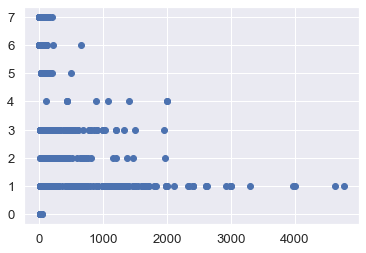

In [78]:
plt.plot(data['capacity_mw'],data['primary_fuel'],'bo')

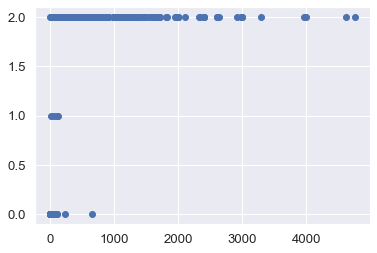

In [79]:
plt.plot(data['capacity_mw'],data['geolocation_source'],'bo')

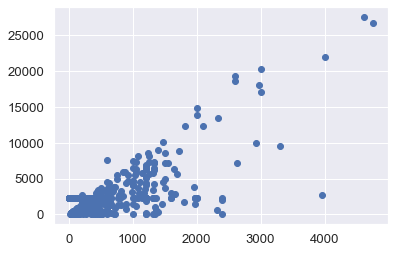

In [80]:
plt.plot(data['capacity_mw'],data['generation_gwh_2013'],'bo')

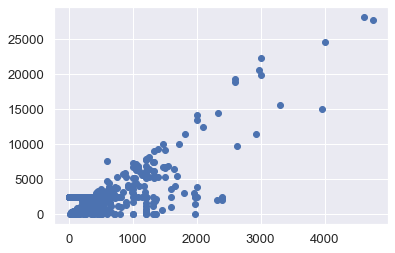

In [81]:
plt.plot(data['capacity_mw'],data['generation_gwh_2014'],'bo')

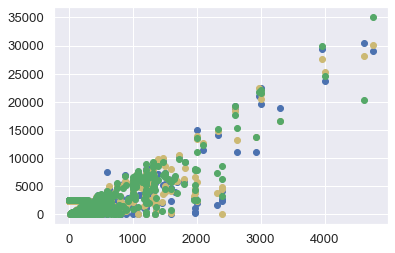

In [82]:
plt.plot(data['capacity_mw'],data['generation_gwh_2015'],'bo')
plt.plot(data['capacity_mw'],data['generation_gwh_2016'],'yo')
plt.plot(data['capacity_mw'],data['generation_gwh_2017'],'go')

In [83]:
X2=data[['primary_fuel','geolocation_source','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]
y2=data['capacity_mw']

In [84]:
X2

,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,6,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,1,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,7,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,2,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...
903,1,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,6,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,7,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,1,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [85]:
X2.skew()

primary_fuel           0.471141
geolocation_source    -2.161710
generation_gwh_2013    5.241491
generation_gwh_2014    5.041961
generation_gwh_2015    5.367370
generation_gwh_2016    5.071758
generation_gwh_2017    5.111938
dtype: float64

In [86]:
# Remove outlier 
X2['generation_gwh_2013']=np.sqrt(data['generation_gwh_2013'])
X2['generation_gwh_2014']=np.sqrt(data['generation_gwh_2014'])
X2['generation_gwh_2015']=np.sqrt(data['generation_gwh_2015'])
X2['generation_gwh_2016']=np.sqrt(data['generation_gwh_2016'])
X2['generation_gwh_2017']=np.sqrt(data['generation_gwh_2017'])

In [87]:
X2.skew()

primary_fuel           0.471141
geolocation_source    -2.161710
generation_gwh_2013    1.037355
generation_gwh_2014    0.988517
generation_gwh_2015    1.057697
generation_gwh_2016    0.982545
generation_gwh_2017    0.901027
dtype: float64

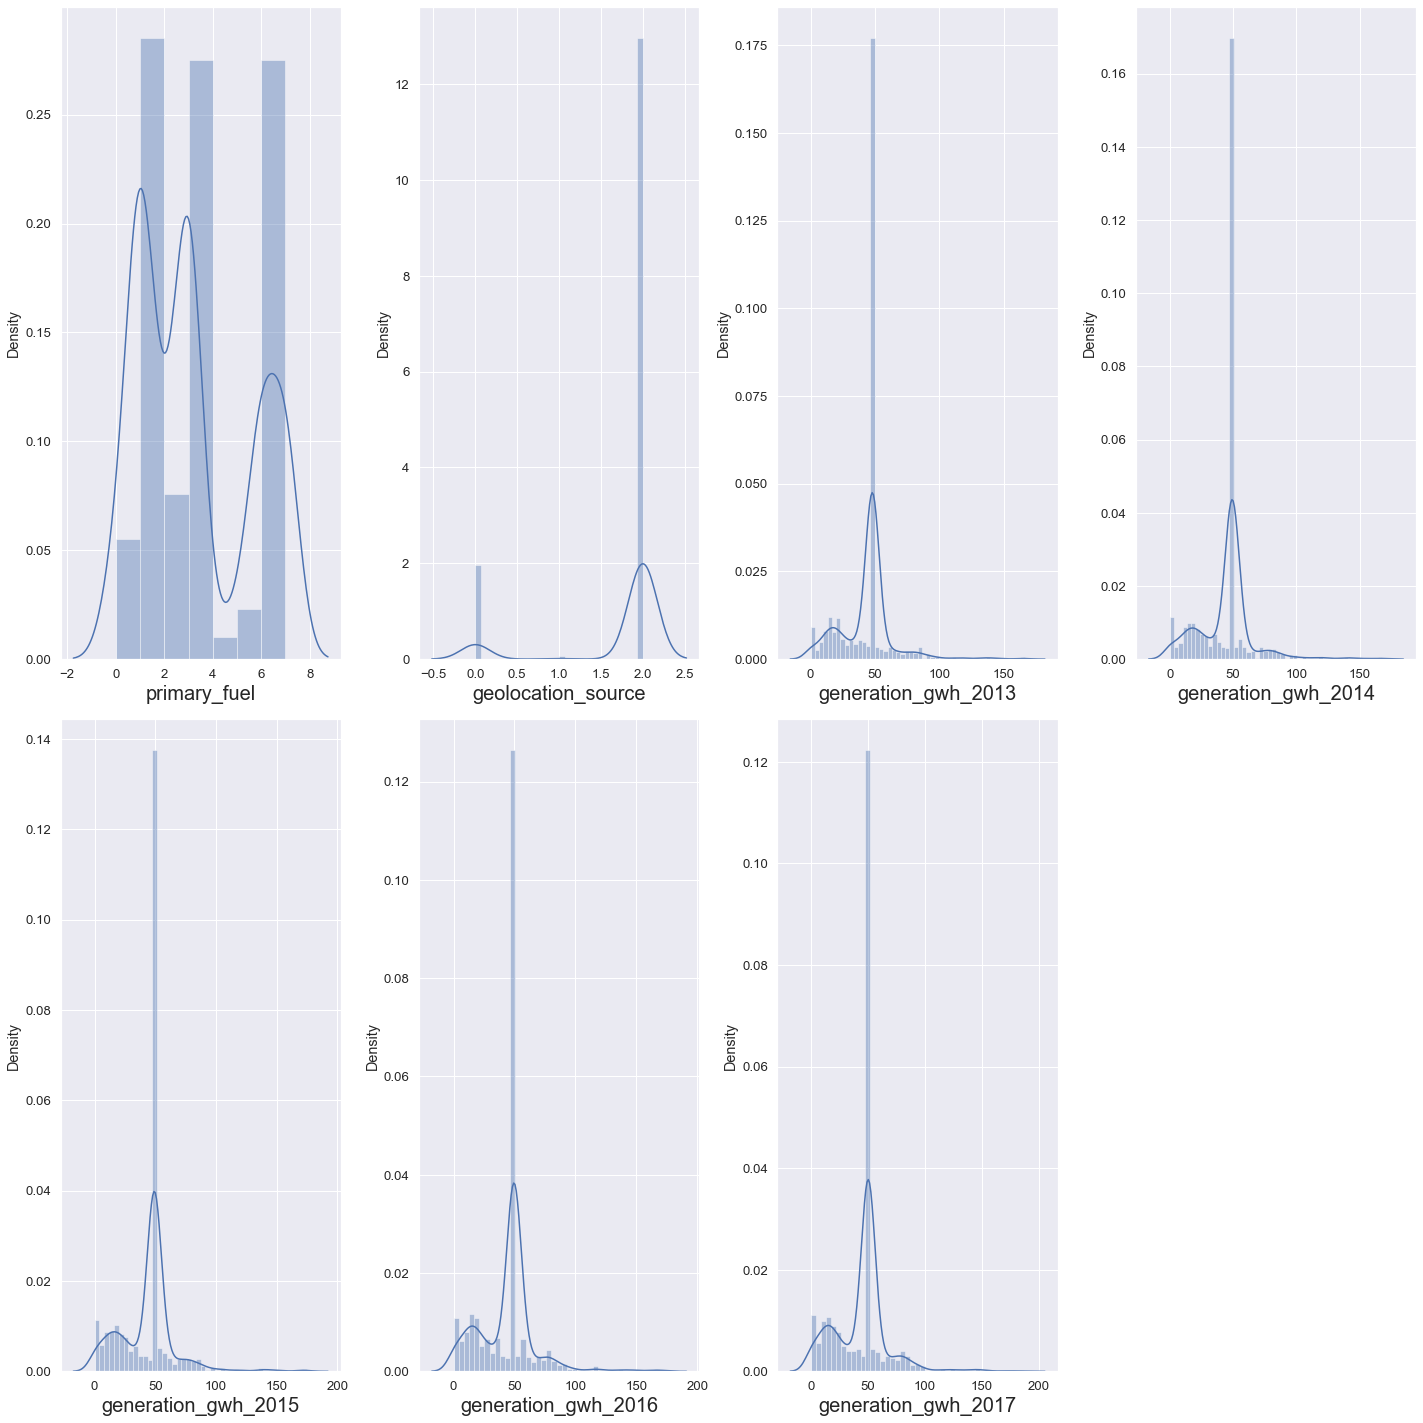

In [88]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in X2:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(X2[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout() # plt.show()

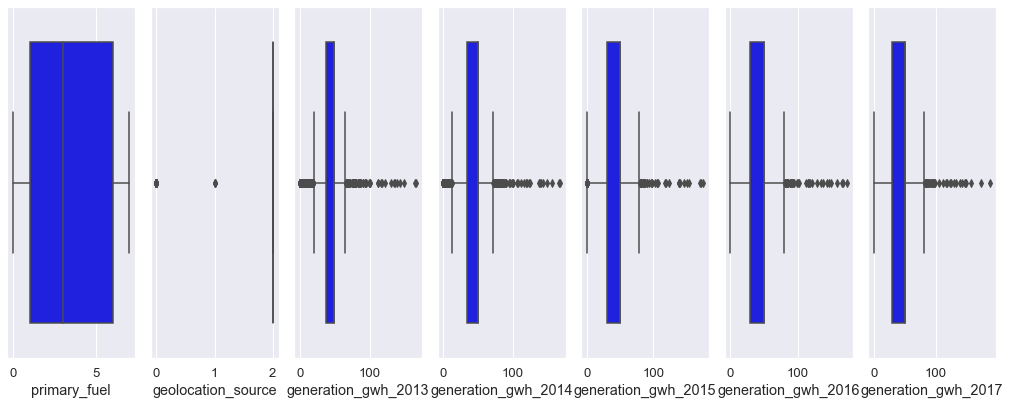

In [89]:
import matplotlib.pyplot as plt
collist=X2.columns.values
ncol=30
nrows=16
plt.figure(figsize=(2*ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(X2[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In [90]:
X2.describe()

,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,3.205947,1.733480,43.420431,44.132422,43.493038,43.738481,44.417766
std,2.281339,0.676835,20.474059,21.754168,22.869281,23.269677,23.652328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,36.503656,34.281680,29.566932,28.751150,29.195954
50%,3.000000,2.000000,48.000617,49.197493,49.133210,49.537221,50.316543
75%,6.000000,2.000000,48.000617,49.197493,49.133210,49.537221,50.316543
max,7.000000,2.000000,166.090939,167.711061,174.754113,173.248377,187.392636


In [91]:
X2

,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,6,1,48.000617,49.197493,49.133210,49.537221,50.316543
1,1,2,48.000617,49.197493,49.133210,49.537221,50.316543
2,7,2,48.000617,49.197493,49.133210,49.537221,50.316543
3,2,2,25.135193,24.855367,29.047323,29.765827,25.763822
4,1,2,40.844706,55.095826,76.917943,79.012657,73.386509
...,...,...,...,...,...,...,...
903,1,2,48.000617,49.197493,0.997434,15.283869,29.417682
904,6,0,48.000617,49.197493,49.133210,49.537221,50.316543
905,7,2,48.000617,49.197493,49.133210,49.537221,50.316543
906,1,2,48.000617,49.197493,49.133210,49.537221,50.316543


In [92]:
y2

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 908, dtype: float64

# Now Here outcome is in countinous data so we use linear regression model for predict capacity_mw

In [93]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [94]:
lr=LinearRegression()
mms=MinMaxScaler()
rf=RandomForestRegressor()
xg=XGBRegressor()

In [95]:
for i in range(0,100):
    feature_train,feature_test,target_train,target_test=train_test_split(X2,y2,test_size=0.25,random_state=i)
    lr.fit(feature_train,target_train)
    pred_train=lr.predict(feature_train)
    pred_test=lr.predict(feature_test)
    print(f"At random state {i},the training accuracy is:-{r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:-{r2_score(target_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:-0.46726135928961965
At random state 0,the testing accuracy is:-0.5473172168933379


At random state 1,the training accuracy is:-0.4648240280626784
At random state 1,the testing accuracy is:-0.5493995757179178


At random state 2,the training accuracy is:-0.5097144606044954
At random state 2,the testing accuracy is:-0.43060608227965025


At random state 3,the training accuracy is:-0.5238038737873217
At random state 3,the testing accuracy is:-0.3832738117964203


At random state 4,the training accuracy is:-0.517444158374609
At random state 4,the testing accuracy is:-0.40403577123343715


At random state 5,the training accuracy is:-0.4495906779150727
At random state 5,the testing accuracy is:-0.5859188655223164


At random state 6,the training accuracy is:-0.5301152290244109
At random state 6,the testing accuracy is:-0.29575060473467474


At random state 7,the training accuracy is:-0.5001005557786673
At random state 7,the testing accuracy is:-0.

At random state 65,the training accuracy is:-0.5176976593430733
At random state 65,the testing accuracy is:-0.40623256576987665


At random state 66,the training accuracy is:-0.48334947390114613
At random state 66,the testing accuracy is:-0.5308314518158486


At random state 67,the training accuracy is:-0.4802894752161364
At random state 67,the testing accuracy is:-0.5150080135493569


At random state 68,the training accuracy is:-0.5377709410373454
At random state 68,the testing accuracy is:-0.2572964466027614


At random state 69,the training accuracy is:-0.4521790087927243
At random state 69,the testing accuracy is:-0.5495597509288039


At random state 70,the training accuracy is:-0.5081448863696585
At random state 70,the testing accuracy is:-0.42522330353430016


At random state 71,the training accuracy is:-0.48546961362906926
At random state 71,the testing accuracy is:-0.5208252537606748


At random state 72,the training accuracy is:-0.48688142496023923
At random state 72,the testi

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X2,y2,test_size=0.25,random_state=8)
for i in [lr,rf,xg]:
    i.fit(feature_train,target_train)
    pred_train=i.predict(feature_train)
    pred_test=i.predict(feature_test)
    print(i)
    print(f"The training accuracy is:-{r2_score(target_train,pred_train)}")
    print(f"The testing accuracy is:-{r2_score(target_test,pred_test)}")
    print("\n")

LinearRegression()
The training accuracy is:-0.5180089335834293
The testing accuracy is:-0.4192580666836715


RandomForestRegressor()
The training accuracy is:-0.976430247523776
The testing accuracy is:-0.8377702327994583


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
The training accuracy is:-0.9952294058176705
The testing accuracy is:-0.8314199000423579




In [97]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [98]:
pred_test=rf.predict(feature_test)
mean_absolute_error(target_test,pred_test)
mean_squared_error(target_test,pred_test)
np.sqrt(mean_squared_error(target_test,pred_test))

222.95017507120693

In [99]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [100]:
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(feature_train,target_train)

LassoCV(normalize=True)

In [101]:
alpha=lasscv.alpha_
alpha

0.12022759069275525

In [102]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(feature_train,target_train)

Lasso(alpha=0.12022759069275525)

In [103]:
lasso_reg.score(feature_train,target_train)

0.5180088350777905

In [104]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(feature_train,target_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [105]:
ridgecv.alpha_

0.071

In [106]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(feature_train,target_train)

Ridge(alpha=0.071)

In [107]:
ridge_model.score(feature_test,target_test)

0.419259369163102

# After using different different linear regressor methods we got best score using RandomForestRegressor 83%

In [108]:
rf.fit(feature_train,target_train)

RandomForestRegressor()

In [109]:
print(f"The training accuracy is:-{r2_score(target_train,pred_train)}")
print(f"The testing accuracy is:-{r2_score(target_test,pred_test)}")

The training accuracy is:-0.9952294058176705
The testing accuracy is:-0.8377702327994583


## Cross Validation Score

In [110]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rf,X2,y2,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for traing is {Train_accuracy} and accuracy for test is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.8044145075958227 and accuracy score for traing is 0.9952294058176705 and accuracy for test is 0.8377702327994583


At cross fold 3 the cv score is 0.8387563176450573 and accuracy score for traing is 0.9952294058176705 and accuracy for test is 0.8377702327994583


At cross fold 4 the cv score is 0.8323172810606065 and accuracy score for traing is 0.9952294058176705 and accuracy for test is 0.8377702327994583


At cross fold 5 the cv score is 0.8388044668775985 and accuracy score for traing is 0.9952294058176705 and accuracy for test is 0.8377702327994583


At cross fold 6 the cv score is 0.8380323466025564 and accuracy score for traing is 0.9952294058176705 and accuracy for test is 0.8377702327994583


At cross fold 7 the cv score is 0.8370318185512426 and accuracy score for traing is 0.9952294058176705 and accuracy for test is 0.8377702327994583


At cross fold 8 the cv score is 0.8417743679764805 and accuracy score for traing is 0.9952294058176705 and

In [111]:
cv_score=cross_val_score(rf,X2,y2,cv=8)
cv_mean=cv_score.mean()
print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for traing is {Train_accuracy} and accuracy for test is {Test_accuracy}")

At cross fold 9 the cv score is 0.8391246449006704 and accuracy score for traing is 0.9952294058176705 and accuracy for test is 0.8377702327994583


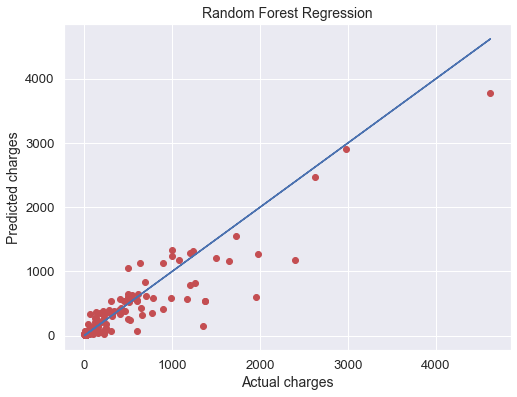

In [112]:
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Random Forest Regression',fontsize=14)
plt.show()

# Model Saving

In [113]:
import pickle
filename='capacity_mw.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [114]:
import numpy as np
a=np.array(target_test)
predicted=np.array(rf.predict(feature_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,4.50,11.492485
1,77.65,112.412000
2,1980.00,1303.353400
3,10.00,11.492485
4,400.00,550.423200
...,...,...
222,605.00,662.832000
223,20.00,11.492485
224,30.50,18.192939
225,16.50,18.192939
